In [1]:
import pandas as pd
import numpy as np
import re
import string

# Search hack on dataframes
### How to use: find(data,"movie_id","equal","tt6723088")

<h3>Search functions available</h3>

<ol>
  <li>Equal</li>
  <li>Not Equal</li>
  <li>Lessser than</li>
  <li>Greater than</li>
  <li>Null</li>    
  <li>Not null</li>
  <li>Contains</li>
  <li>Not contains</li>
  <li>Duplicate</li>
  <li>Index</li>
  <li>Unique Value</li>
  <li>Unique Count</li>
</ol> 

In [2]:
# Useful Search hack for any value in a column


def find(dataFrame,columnName,operation,searchElement):
    operation = operation.lower().translate(str.maketrans('', '', string.whitespace))
    if operation == "equal": 
        return dataFrame.loc[dataFrame[columnName] == searchElement]
    elif operation == "notequal":
        return dataFrame.loc[dataFrame[columnName] != searchElement]
    elif operation == "lesserthan":
        return dataFrame.loc[dataFrame[columnName] < searchElement]
    elif operation == "greaterthan": 
        return dataFrame.loc[dataFrame[columnName] > searchElement]
    elif operation == "null":
        return dataFrame.loc[dataFrame[columnName].isna()] 
    elif operation == "notnull":
        dataFrame.loc[dataFrame[columnName].notnull()]
    elif operation == "contains":
        return dataFrame[dataFrame[columnName].str.contains(searchElement)]
    elif operation == "notcontains":
        return dataFrame[~dataFrame[columnName].str.contains(searchElement)]   
    elif operation == "duplicate":
        return dataFrame[dataFrame.duplicated([columnName])].sort_values(by=[columnName])
    elif operation == "index":
        return dataFrame.index[dataFrame[columnName] == searchElement].tolist()
    elif operation == "uniquevalue":
        return dataFrame[columnName].unique()
    elif operation == "uniquecount":
        return dataFrame[columnName].nunique()
    else:
        print("The operations you can use are listed above! \n")

In [3]:
fileLocation = 'C:\\Users\\VictorY\\Desktop\\TestData\\stage3FinalProcessedDF_Nov-24-2019.csv'
#fileLocation = 'C:\\Yuva\\ITU\\3rd Sem\\Research Topics\\Movies & Gender\\Data\\IMDb\\stage3FinalProcessedDF_Nov-17-2019.csv'

data = pd.read_csv(fileLocation)

# Reset the missing years in birth and death year of director to 0
data.loc[(data['deathYear'].str.contains('N',na=False) | data['deathYear'].isna()), 'deathYear'] = 0
data.loc[(data['birthYear'].str.contains('N',na=False) | data['birthYear'].isna() ), 'birthYear'] = 0
# data.loc[data['deathYear'].isna(), 'deathYear'] = 0
# data.loc[data['birthYear'].isna(), 'birthYear'] = 0

In [4]:
find(data,"movie_id","uniquecount",0)

566575

In [5]:
data

,director_ids,director_names,movie_id,title,review_count_user,review_count_critic,metascore,rating_value,rating_count,date_published,Genre,release_date,movie_year,birthYear,deathYear,primaryProfession,knownForTitles,Gender
0,nm0005690,William K.L. Dickson,tt0000001,Carmencita - spanyol tánc (1894) - IMDb,12,2,None,5.8,1255,1894-03-10,Documentary \tShort,10 March 1894 (USA) See more »,1894,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",Male
1,nm0721526,Émile Reynaud,tt0000002,A bohóc és kutyái (1892) - IMDb,0,None,None,6.5,148,1892-10-28,Animation \tShort,28 October 1892 (France) See more »,1892,1844,1918,director,"tt2184231,tt0000003,tt2184201,tt0413219",Male
2,nm0721526,Émile Reynaud,tt0000003,Szegény Pierrot (1892) - IMDb,12,5,None,6.6,819,1892-10-28,Animation \tComedy \tShort \tRomance,28 October 1892 (France) See more »,1892,1844,1918,director,"tt2184231,tt0000003,tt2184201,tt0413219",Male
3,nm0721526,Émile Reynaud,tt0000004,Egy jó pohár sör (1892) - IMDb,1,None,None,6.6,90,1892-10-28,Animation \tShort,28 October 1892 (France) See more »,1892,1844,1918,director,"tt2184231,tt0000003,tt2184201,tt0413219",Male
4,nm0005690,William K.L. Dickson,tt0000005,A patkolókovács (1893) - IMDb,18,3,None,6.2,1499,1893-05-09,Short,9 May 1893 (USA) See more »,1893,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",Male
5,nm0005690,William K.L. Dickson,tt0000006,Kínai ópiumbarlang (1894) - IMDb,None,None,None,5.7,70,1894-10-17,Short,17 October 1894 (UK) See more »,1894,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",Male
6,nm0005690,William K.L. Dickson,tt0000007,A Corbett-Courtney bokszmeccs (1894) - IMDb,5,2,None,5.5,499,2008-12-31,Short \tSport,None,1894,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",Male
7,nm0374658,William Heise,tt0000007,A Corbett-Courtney bokszmeccs (1894) - IMDb,5,2,None,5.5,499,2008-12-31,Short \tSport,None,1894,1847,1910,"cinematographer,director,producer","tt0285863,tt0241393,tt0229665,tt0241715",Male
8,nm0005690,William K.L. Dickson,tt0000008,Edison asszisztense tüsszent (1894) - IMDb,19,4,None,5.6,1341,1894-01-09,Documentary \tShort,9 January 1894 (USA) See more »,1894,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",Male
9,nm0085156,Alexander Black,tt0000009,Miss Jerry (1894) - IMDb,1,2,None,5.6,58,1894-10-09,Romance,9 October 1894 (USA) See more »,1894,1859,1940,"director,writer,cinematographer",tt0000009,Male


In [6]:
# Sort ascending by movie_year to find the first movie produced year of each director

sortAscendingDF = data.sort_values(by='movie_year',ascending = True)
AscendingWithoutDuplicatesDP = sortAscendingDF.drop_duplicates(subset= 'director_ids',keep='first')

# Store Career Start year of each director. Fetch the columns required for merge

fetchFirstMovieYearDF = AscendingWithoutDuplicatesDP[['movie_year','director_ids']]
fetchFirstMovieYearDF = fetchFirstMovieYearDF.rename(columns={'movie_year':'CareerStartYear'})

WithFirstMovieYearDF = data.merge(fetchFirstMovieYearDF, on='director_ids',how = 'left')
#WithFirstMovieYearDF["Career_Year_Number"] = WithFirstMovieYearDF.movie_year - WithFirstMovieYearDF.CareerStartYear + 1
WithFirstMovieYearDF["Career_Year_Number"] = WithFirstMovieYearDF.movie_year - WithFirstMovieYearDF.CareerStartYear

In [7]:
WithFirstMovieYearDF

,director_ids,director_names,movie_id,title,review_count_user,review_count_critic,metascore,rating_value,rating_count,date_published,Genre,release_date,movie_year,birthYear,deathYear,primaryProfession,knownForTitles,Gender,CareerStartYear,Career_Year_Number
0,nm0005690,William K.L. Dickson,tt0000001,Carmencita - spanyol tánc (1894) - IMDb,12,2,None,5.8,1255,1894-03-10,Documentary \tShort,10 March 1894 (USA) See more »,1894,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",Male,1890,4
1,nm0721526,Émile Reynaud,tt0000002,A bohóc és kutyái (1892) - IMDb,0,None,None,6.5,148,1892-10-28,Animation \tShort,28 October 1892 (France) See more »,1892,1844,1918,director,"tt2184231,tt0000003,tt2184201,tt0413219",Male,1892,0
2,nm0721526,Émile Reynaud,tt0000003,Szegény Pierrot (1892) - IMDb,12,5,None,6.6,819,1892-10-28,Animation \tComedy \tShort \tRomance,28 October 1892 (France) See more »,1892,1844,1918,director,"tt2184231,tt0000003,tt2184201,tt0413219",Male,1892,0
3,nm0721526,Émile Reynaud,tt0000004,Egy jó pohár sör (1892) - IMDb,1,None,None,6.6,90,1892-10-28,Animation \tShort,28 October 1892 (France) See more »,1892,1844,1918,director,"tt2184231,tt0000003,tt2184201,tt0413219",Male,1892,0
4,nm0005690,William K.L. Dickson,tt0000005,A patkolókovács (1893) - IMDb,18,3,None,6.2,1499,1893-05-09,Short,9 May 1893 (USA) See more »,1893,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",Male,1890,3
5,nm0005690,William K.L. Dickson,tt0000006,Kínai ópiumbarlang (1894) - IMDb,None,None,None,5.7,70,1894-10-17,Short,17 October 1894 (UK) See more »,1894,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",Male,1890,4
6,nm0005690,William K.L. Dickson,tt0000007,A Corbett-Courtney bokszmeccs (1894) - IMDb,5,2,None,5.5,499,2008-12-31,Short \tSport,None,1894,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",Male,1890,4
7,nm0374658,William Heise,tt0000007,A Corbett-Courtney bokszmeccs (1894) - IMDb,5,2,None,5.5,499,2008-12-31,Short \tSport,None,1894,1847,1910,"cinematographer,director,producer","tt0285863,tt0241393,tt0229665,tt0241715",Male,1890,4
8,nm0005690,William K.L. Dickson,tt0000008,Edison asszisztense tüsszent (1894) - IMDb,19,4,None,5.6,1341,1894-01-09,Documentary \tShort,9 January 1894 (USA) See more »,1894,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",Male,1890,4
9,nm0085156,Alexander Black,tt0000009,Miss Jerry (1894) - IMDb,1,2,None,5.6,58,1894-10-09,Romance,9 October 1894 (USA) See more »,1894,1859,1940,"director,writer,cinematographer",tt0000009,Male,1894,0


In [8]:
WithFirstMovieYearDF.nunique()

director_ids           145328
director_names         142535
movie_id               566575
title                  564051
review_count_user        1044
review_count_critic       538
metascore                 101
rating_value               92
rating_count            13827
date_published          33828
Genre                    9548
release_date           175667
movie_year                132
birthYear                 164
deathYear                 114
primaryProfession        4231
knownForTitles         143214
Gender                      2
CareerStartYear           130
Career_Year_Number         89
dtype: int64

In [9]:
# Convert into int years before using

WithFirstMovieYearDF.movie_year = WithFirstMovieYearDF.movie_year.astype(int)
WithFirstMovieYearDF.deathYear = WithFirstMovieYearDF.deathYear.astype(int)
WithFirstMovieYearDF.birthYear = WithFirstMovieYearDF.birthYear.astype(int)

In [10]:
# The records which we believe contain incorrect data. i.e. movies released after 10 years of directors death
years_after_death = 10
dropIncorrectlyRecordedYears = WithFirstMovieYearDF.loc[(WithFirstMovieYearDF.movie_year - WithFirstMovieYearDF.deathYear >= years_after_death) & (WithFirstMovieYearDF.deathYear !=0)]
dropIncorrectlyRecordedYears

,director_ids,director_names,movie_id,title,review_count_user,review_count_critic,metascore,rating_value,rating_count,date_published,Genre,release_date,movie_year,birthYear,deathYear,primaryProfession,knownForTitles,Gender,CareerStartYear,Career_Year_Number
18652,nm0883920,Travers Vale,tt0037732,Gaslight Follies (1945) - IMDb,1,None,None,5.2,12,1945-09-28,Documentary,28 September 1945 (USA) See more »,1945,1865,1927,"director,writer,producer","tt0008557,tt0013483,tt0002901,tt0007426",Male,1917,28
21169,nm0000248,Edward D. Wood Jr.,tt0040844,Crossroads of Laredo (1995) - IMDb,4,2,None,3.8,151,2008-12-17,Short \tWestern,None,1995,1924,1978,"writer,director,actor","tt0045826,tt0047127,tt0067479,tt0052077",Male,1951,44
29782,nm0001178,Sergei M. Eisenstein,tt0051790,Rettegett Iván 2. (1958) - IMDb,34,28,None,7.7,5234,1958-09-01,Biography \tHistory,1 September 1958 (Soviet Union) See more »,1958,1898,1948,"director,writer,editor","tt0079020,tt0037824,tt0029850,tt0015648",Male,1923,35
36784,nm0247484,B. Reeves Eason,tt0060152,Bat Men of Africa (TV Movie 1966) - IMDb,1,1,None,5.2,5,2015-05-18,Action \tAdventure \tDrama,None,1966,1886,1956,"director,actor,assistant_director","tt0025544,tt0026038,tt0021306,tt0027502",Male,1919,47
36879,nm0105175,Fred C. Brannon,tt0060273,Cyclotrode 'X' (TV Movie 1966) - IMDb,4,1,None,5.0,21,2016-11-01,Adventure \tSci-Fi,None,1966,1901,1953,"director,art_department","tt0038435,tt0041547,tt0042600,tt0042873",Male,1945,21
36881,nm0105175,Fred C. Brannon,tt0060274,D-Day on Mars (TV Movie 1966) - IMDb,2critic,None,None,2.8,12,None,Sci-Fi,None,1966,1901,1953,"director,art_department","tt0038435,tt0041547,tt0042600,tt0042873",Male,1945,21
37151,nm0342622,Wallace Grissell,tt0060576,Jungle Gold (TV Movie 1966) - IMDb,None,None,None,6.0,6,None,Adventure,None,1966,1904,1954,"director,editor,editorial_department","tt0037694,tt0037895,tt0036900,tt0038248",Male,1944,22
37421,nm0105175,Fred C. Brannon,tt0060881,R.C.M.P. and the Treasure of Genghis Khan (TV ...,None,None,None,6.3,6,None,Action,None,1966,1901,1953,"director,art_department","tt0038435,tt0041547,tt0042600,tt0042873",Male,1945,21
37434,nm0105175,Fred C. Brannon,tt0060895,"Retik, the Moon Menace (TV Movie 1966) - IMDb",2,2,None,3.9,7,2002-07-09,Sci-Fi,None,1966,1901,1953,"director,art_department","tt0038435,tt0041547,tt0042600,tt0042873",Male,1945,21
37443,nm0853028,Ray Taylor,tt0060906,Robinson Crusoe of Mystery Island (TV Movie 19...,1critic,None,None,4.6,11,None,Adventure,None,1966,1888,1952,"director,assistant_director,producer","tt0032475,tt0031394,tt0022811,tt0020272",Male,1927,39


In [11]:
# Drop all values containing incorrect recorded years as per the above assumption

WithFirstMovieYearDF.drop(dropIncorrectlyRecordedYears.index, inplace= True)

In [12]:
WithFirstMovieYearDF

,director_ids,director_names,movie_id,title,review_count_user,review_count_critic,metascore,rating_value,rating_count,date_published,Genre,release_date,movie_year,birthYear,deathYear,primaryProfession,knownForTitles,Gender,CareerStartYear,Career_Year_Number
0,nm0005690,William K.L. Dickson,tt0000001,Carmencita - spanyol tánc (1894) - IMDb,12,2,None,5.8,1255,1894-03-10,Documentary \tShort,10 March 1894 (USA) See more »,1894,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",Male,1890,4
1,nm0721526,Émile Reynaud,tt0000002,A bohóc és kutyái (1892) - IMDb,0,None,None,6.5,148,1892-10-28,Animation \tShort,28 October 1892 (France) See more »,1892,1844,1918,director,"tt2184231,tt0000003,tt2184201,tt0413219",Male,1892,0
2,nm0721526,Émile Reynaud,tt0000003,Szegény Pierrot (1892) - IMDb,12,5,None,6.6,819,1892-10-28,Animation \tComedy \tShort \tRomance,28 October 1892 (France) See more »,1892,1844,1918,director,"tt2184231,tt0000003,tt2184201,tt0413219",Male,1892,0
3,nm0721526,Émile Reynaud,tt0000004,Egy jó pohár sör (1892) - IMDb,1,None,None,6.6,90,1892-10-28,Animation \tShort,28 October 1892 (France) See more »,1892,1844,1918,director,"tt2184231,tt0000003,tt2184201,tt0413219",Male,1892,0
4,nm0005690,William K.L. Dickson,tt0000005,A patkolókovács (1893) - IMDb,18,3,None,6.2,1499,1893-05-09,Short,9 May 1893 (USA) See more »,1893,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",Male,1890,3
5,nm0005690,William K.L. Dickson,tt0000006,Kínai ópiumbarlang (1894) - IMDb,None,None,None,5.7,70,1894-10-17,Short,17 October 1894 (UK) See more »,1894,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",Male,1890,4
6,nm0005690,William K.L. Dickson,tt0000007,A Corbett-Courtney bokszmeccs (1894) - IMDb,5,2,None,5.5,499,2008-12-31,Short \tSport,None,1894,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",Male,1890,4
7,nm0374658,William Heise,tt0000007,A Corbett-Courtney bokszmeccs (1894) - IMDb,5,2,None,5.5,499,2008-12-31,Short \tSport,None,1894,1847,1910,"cinematographer,director,producer","tt0285863,tt0241393,tt0229665,tt0241715",Male,1890,4
8,nm0005690,William K.L. Dickson,tt0000008,Edison asszisztense tüsszent (1894) - IMDb,19,4,None,5.6,1341,1894-01-09,Documentary \tShort,9 January 1894 (USA) See more »,1894,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",Male,1890,4
9,nm0085156,Alexander Black,tt0000009,Miss Jerry (1894) - IMDb,1,2,None,5.6,58,1894-10-09,Romance,9 October 1894 (USA) See more »,1894,1859,1940,"director,writer,cinematographer",tt0000009,Male,1894,0


In [13]:
WithFirstMovieYearDF.Career_Year_Number.value_counts()

0     169515
1      34319
2      32495
3      29845
4      27719
5      25244
6      24145
7      22817
8      21007
9      19980
10     18635
11     17119
12     15823
13     14881
14     13726
15     12704
16     11998
17     10767
18      9955
19      9227
20      8698
21      7600
22      7112
23      6160
24      5601
25      5049
26      4775
27      4342
28      3786
29      3422
       ...  
54        59
55        58
56        50
57        38
58        33
59        22
60        21
63         9
64         7
62         7
61         7
65         6
66         5
68         5
69         4
72         3
77         3
75         3
71         3
70         3
81         2
73         2
74         2
76         2
67         2
83         2
79         2
84         1
78         1
91         1
Name: Career_Year_Number, Length: 84, dtype: int64

# Cleaned the data for Pivot operations

In [14]:
# Act as a counter for pivot table calculations

WithFirstMovieYearDF['Dummy'] = 1

In [15]:
WithFirstMovieYearDF.head()

,director_ids,director_names,movie_id,title,review_count_user,review_count_critic,metascore,rating_value,rating_count,date_published,...,release_date,movie_year,birthYear,deathYear,primaryProfession,knownForTitles,Gender,CareerStartYear,Career_Year_Number,Dummy
0,nm0005690,William K.L. Dickson,tt0000001,Carmencita - spanyol tánc (1894) - IMDb,12,2,None,5.8,1255,1894-03-10,...,10 March 1894 (USA) See more »,1894,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",Male,1890,4,1
1,nm0721526,Émile Reynaud,tt0000002,A bohóc és kutyái (1892) - IMDb,0,None,None,6.5,148,1892-10-28,...,28 October 1892 (France) See more »,1892,1844,1918,director,"tt2184231,tt0000003,tt2184201,tt0413219",Male,1892,0,1
2,nm0721526,Émile Reynaud,tt0000003,Szegény Pierrot (1892) - IMDb,12,5,None,6.6,819,1892-10-28,...,28 October 1892 (France) See more »,1892,1844,1918,director,"tt2184231,tt0000003,tt2184201,tt0413219",Male,1892,0,1
3,nm0721526,Émile Reynaud,tt0000004,Egy jó pohár sör (1892) - IMDb,1,None,None,6.6,90,1892-10-28,...,28 October 1892 (France) See more »,1892,1844,1918,director,"tt2184231,tt0000003,tt2184201,tt0413219",Male,1892,0,1
4,nm0005690,William K.L. Dickson,tt0000005,A patkolókovács (1893) - IMDb,18,3,None,6.2,1499,1893-05-09,...,9 May 1893 (USA) See more »,1893,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",Male,1890,3,1


In [16]:
malePivotData = WithFirstMovieYearDF.loc[WithFirstMovieYearDF['Gender'] == 'Male']

In [17]:
malePivotData.nunique()

director_ids           113411
director_names         110776
movie_id               483721
title                  481935
review_count_user        1013
review_count_critic       535
metascore                 101
rating_value               92
rating_count            12965
date_published          33450
Genre                    8848
release_date           158526
movie_year                131
birthYear                 163
deathYear                 113
primaryProfession        3691
knownForTitles         111911
Gender                      1
CareerStartYear           129
Career_Year_Number         84
Dummy                       1
dtype: int64

In [18]:
femalePivotData = WithFirstMovieYearDF.loc[WithFirstMovieYearDF['Gender'] == 'Female']

In [19]:
femalePivotData.nunique()

director_ids           31912
director_names         31750
movie_id               96915
title                  96786
review_count_user        403
review_count_critic      282
metascore                 89
rating_value              92
rating_count            4020
date_published         17861
Genre                   3811
release_date           54115
movie_year               124
birthYear                135
deathYear                 96
primaryProfession       2109
knownForTitles         31574
Gender                     1
CareerStartYear          119
Career_Year_Number        60
Dummy                      1
dtype: int64

In [20]:
# Reseting the pivot table index so I can have directorID and Gender as column and rotate

malePivotTable = pd.pivot_table(malePivotData, values='Dummy', index=['director_ids'],
                                columns=['Career_Year_Number',], aggfunc=np.sum)

In [21]:
# Reseting the pivot table index so I can have directorID and Gender as column and rotate

femalePivotTable = pd.pivot_table(femalePivotData, values='Dummy', index=['director_ids'],
                                  columns=['Career_Year_Number'], aggfunc=np.sum)

In [22]:
overallPivotTable = pd.pivot_table(WithFirstMovieYearDF, values='Dummy', index=['director_ids'],
                                   columns=['Career_Year_Number'], aggfunc=np.sum)

In [23]:
femalePivotTable.head()

Career_Year_Number,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,60,70
director_ids,,,,,,,,,,,,,,,,,,,,,
nm0000096,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000098,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000099,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000113,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000125,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
malePivotTable.head()

Career_Year_Number,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,81,83,84,91
director_ids,,,,,,,,,,,,,,,,,,,,,
nm0000005,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000008,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000009,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000010,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000018,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
overallPivotTable.head()

Career_Year_Number,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,81,83,84,91
director_ids,,,,,,,,,,,,,,,,,,,,,
nm0000005,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000008,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000009,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000010,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000018,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Capture career length

In [26]:
#overallPivotTable = saef.copy()
saef = overallPivotTable.copy()

In [27]:
# # Reverse the columns to search from the last career year number
# overallPivotTable = overallPivotTable[overallPivotTable.columns[::-1]]

In [28]:
# Function to find the column name of the last non null value. This is our career length of every director

def columnNameOfFirstNonNullValue(x):
    if x.last_valid_index() is None:
        return None
    else:
        return x.last_valid_index()

In [29]:
career_length_overall = overallPivotTable.apply(columnNameOfFirstNonNullValue, axis= 'columns')
career_length_male = malePivotTable.apply(columnNameOfFirstNonNullValue, axis= 'columns')
career_length_female = femalePivotTable.apply(columnNameOfFirstNonNullValue, axis= 'columns')

In [30]:
career_length_overall
#career_length_male
#career_length_female

director_ids
nm0000005    62
nm0000008     0
nm0000009     0
nm0000010     0
nm0000018     2
nm0000019    39
nm0000024     0
nm0000032    16
nm0000033    60
nm0000036    48
nm0000037    27
nm0000040    48
nm0000041    52
nm0000044    20
nm0000045     6
nm0000048     0
nm0000050     0
nm0000056    19
nm0000057     0
nm0000059    32
nm0000063     0
nm0000069     8
nm0000071     0
nm0000076    28
nm0000078    16
nm0000080    58
nm0000083    22
nm0000086     0
nm0000088    31
nm0000090     0
             ..
nm8959262     0
nm8963732     0
nm8970382     0
nm8985204     4
nm8988355     0
nm8999744     0
nm9000326     0
nm9007678     0
nm9009028     0
nm9013682     0
nm9023517     4
nm9026707     0
nm9036921     0
nm9036922     0
nm9044404     0
nm9082106     0
nm9093949     0
nm9122531     0
nm9128238     0
nm9129783     0
nm9129851     0
nm9131638     0
nm9136793     0
nm9140397     0
nm9141900     0
nm9154996     0
nm9156495     0
nm9161613     0
nm9182259     0
nm9196080     0
Length: 145

In [31]:
# Verify
#career_length_overall['nm0210701']
career_length_overall['nm0000080']


58

In [32]:
#overallPivotTable[overallPivotTable.notnull()].to_csv('csv.csv')
#nm0210701


In [33]:
overallPivotTable["career_length"] = career_length_overall.tolist()
malePivotTable["career_length"] = career_length_male.tolist()
femalePivotTable["career_length"] = career_length_female.tolist()

In [34]:
overallPivotTable

Career_Year_Number,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,81,83,84,91,career_length
director_ids,,,,,,,,,,,,,,,,,,,,,
nm0000005,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62
nm0000008,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
nm0000009,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
nm0000010,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
nm0000018,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
nm0000019,1.0,1.0,2.0,1.0,1.0,NaN,1.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39
nm0000024,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
nm0000032,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16
nm0000033,1.0,NaN,3.0,3.0,4.0,2.0,3.0,1.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60


In [35]:
# Important: Fill 0s wherever the it is empty for each director until their career ends -- Overall

m1 = overallPivotTable.columns[:-1].values <= overallPivotTable.career_length.values[:, None]
overallPivotTableFinal = overallPivotTable.iloc[:, :-1].fillna(value = 0, axis=1).where(m1)

In [36]:
# Important: Fill 0s wherever the it is empty for each director until their career ends -- female

m2= femalePivotTable.columns[:-1].values <= femalePivotTable.career_length.values[:, None]
femalePivotTableFinal = femalePivotTable.iloc[:, :-1].fillna(value = 0, axis=1).where(m2)

In [37]:
# Important: Fill 0s wherever the it is empty for each director until their career ends -- male

m3 = malePivotTable.columns[:-1].values <= malePivotTable.career_length.values[:, None]
malePivotTableFinal = malePivotTable.iloc[:, :-1].fillna(value = 0, axis=1).where(m3)

In [38]:
overallPivotTableFinal

Career_Year_Number,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,81,83,84,91
director_ids,,,,,,,,,,,,,,,,,,,,,
nm0000005,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000008,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000009,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000010,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000018,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000019,1.0,1.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000024,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000032,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000033,1.0,0.0,3.0,3.0,4.0,2.0,3.0,1.0,0.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
overallPivotTableFinal.count(axis=0)

Career_Year_Number
0     145319
1      59411
2      54298
3      49124
4      44343
5      39872
6      35944
7      32528
8      29400
9      26627
10     24093
11     21782
12     19754
13     17957
14     16283
15     14785
16     13489
17     12290
18     11205
19     10212
20      9246
21      8390
22      7653
23      6912
24      6330
25      5746
26      5204
27      4736
28      4275
29      3899
       ...  
54       126
55       101
56        90
57        75
58        57
59        45
60        35
61        25
62        22
63        19
64        16
65        13
66        10
67         9
68         8
69         7
70         7
71         6
72         6
73         4
74         4
75         4
76         3
77         3
78         2
79         2
81         2
83         2
84         2
91         1
Length: 84, dtype: int64

In [40]:
overallPivotTableFinal.sum(axis=0)

Career_Year_Number
0     169515.0
1      34319.0
2      32495.0
3      29845.0
4      27719.0
5      25244.0
6      24145.0
7      22817.0
8      21007.0
9      19980.0
10     18635.0
11     17119.0
12     15823.0
13     14881.0
14     13726.0
15     12704.0
16     11998.0
17     10767.0
18      9955.0
19      9227.0
20      8698.0
21      7600.0
22      7112.0
23      6160.0
24      5601.0
25      5049.0
26      4775.0
27      4342.0
28      3786.0
29      3422.0
        ...   
54        59.0
55        58.0
56        50.0
57        38.0
58        33.0
59        22.0
60        21.0
61         7.0
62         7.0
63         9.0
64         7.0
65         6.0
66         5.0
67         2.0
68         5.0
69         4.0
70         3.0
71         3.0
72         3.0
73         2.0
74         2.0
75         3.0
76         2.0
77         3.0
78         1.0
79         2.0
81         2.0
83         2.0
84         1.0
91         1.0
Length: 84, dtype: float64

# Maybe use this to calculate top 3 directors

In [41]:
# Maybe use this to calculate top 3 Female directors with highest movies
femalePivotTable.sum(axis=1)

director_ids
nm0000096     16.0
nm0000098      7.0
nm0000099      2.0
nm0000113      1.0
nm0000125      1.0
nm0000149     36.0
nm0000159      1.0
nm0000161      1.0
nm0000162      3.0
nm0000166     32.0
nm0000183      1.0
nm0000187      8.0
nm0000193      1.0
nm0000204      9.0
nm0000212      1.0
nm0000240      1.0
nm0000241     21.0
nm0000272     11.0
nm0000275      5.0
nm0000278     17.0
nm0000291      4.0
nm0000294    105.0
nm0000333     10.0
nm0000360      1.0
nm0000365     28.0
nm0000368     21.0
nm0000376      9.0
nm0000379      5.0
nm0000398      7.0
nm0000420      5.0
             ...  
nm8822854      1.0
nm8823556      1.0
nm8824211      1.0
nm8827391      1.0
nm8827793      1.0
nm8841076      1.0
nm8849320      1.0
nm8856598      1.0
nm8857559      1.0
nm8862879      1.0
nm8863860      1.0
nm8864578      1.0
nm8870314      1.0
nm8872337      1.0
nm8881438      1.0
nm8881574      1.0
nm8893838      1.0
nm8899918      1.0
nm8910409      1.0
nm8941286      1.0
nm8941842      1.0

In [42]:
# Count non null values in rows
femalePivotTable.count(axis=0)

Career_Year_Number
0                31911
1                 3060
2                 3177
3                 3003
4                 2798
5                 2454
6                 2241
7                 2080
8                 1817
9                 1683
10                1532
11                1336
12                1222
13                1095
14                 971
15                 900
16                 819
17                 715
18                 640
19                 587
20                 546
21                 471
22                 467
23                 388
24                 353
25                 324
26                 291
27                 257
28                 219
29                 215
                 ...  
31                 157
32                 136
33                 102
34                 116
35                  96
36                  72
37                  63
38                  63
39                  54
40                  49
41                  41
42             

In [43]:
overallPivotTableFinal.shape[0]
#femalePivotTableFinal.shape[0]
#malePivotTableFinal.shape[0]

145319

In [44]:
# # Divide by overall gender directors ( dividing by shape )

# female_avg_movie_per_year =  femalePivotTableFinal.sum(axis=0) / femalePivotTableFinal.shape[0]
# male_avg_movie_per_year = malePivotTableFinal.sum(axis=0) / malePivotTableFinal.shape[0]
# overall_avg_movie_per_year = overallPivotTable.sum(axis=0) / overallPivotTable.shape[0]

# # Divide by overall directors  ( dividing by shape )

# female_avg_movie_per_year =  femalePivotTableFinal.sum(axis=0) / overallPivotTable.shape[0]
# male_avg_movie_per_year = malePivotTableFinal.sum(axis=0) / overallPivotTable.shape[0]
# overall_avg_movie_per_year = overallPivotTable.sum(axis=0) / overallPivotTable.shape[0]

# Divide by values with respect to each directors career length ( dividing by count, this neglects the NA in the column )

female_avg_movie_per_year =  femalePivotTableFinal.sum(axis=0) / femalePivotTableFinal.count(axis=0)
male_avg_movie_per_year = malePivotTableFinal.sum(axis=0) / malePivotTableFinal.count(axis=0)
overall_avg_movie_per_year = overallPivotTableFinal.sum(axis=0) / overallPivotTableFinal.count(axis=0)


In [45]:
overall_avg_movie_per_year
#male_avg_movie_per_year
#female_avg_movie_per_year

Career_Year_Number
0     1.166503
1     0.577654
2     0.598457
3     0.607544
4     0.625104
5     0.633126
6     0.671739
7     0.701457
8     0.714524
9     0.750366
10    0.773461
11    0.785924
12    0.801002
13    0.828702
14    0.842965
15    0.859249
16    0.889465
17    0.876078
18    0.888443
19    0.903545
20    0.940731
21    0.905840
22    0.929309
23    0.891204
24    0.884834
25    0.878698
26    0.917563
27    0.916807
28    0.885614
29    0.877661
        ...   
54    0.468254
55    0.574257
56    0.555556
57    0.506667
58    0.578947
59    0.488889
60    0.600000
61    0.280000
62    0.318182
63    0.473684
64    0.437500
65    0.461538
66    0.500000
67    0.222222
68    0.625000
69    0.571429
70    0.428571
71    0.500000
72    0.500000
73    0.500000
74    0.500000
75    0.750000
76    0.666667
77    1.000000
78    0.500000
79    1.000000
81    1.000000
83    1.000000
84    0.500000
91    1.000000
Length: 84, dtype: float64

# Plotting the values

In [46]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
import matplotlib.pyplot
import seaborn as sns
import numpy as np
import pandas as pd
#plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})
%matplotlib inline

In [47]:
femaleAvgDF = female_avg_movie_per_year.to_frame()
femaleAvgDF = femaleAvgDF.reset_index(inplace= False)
femaleAvgDF.columns = ['Career_Year_Number', 'Average']

In [48]:
maleAvgDF = male_avg_movie_per_year.to_frame()
maleAvgDF = maleAvgDF.reset_index(inplace= False)
maleAvgDF.columns = ['Career_Year_Number', 'Average']

In [49]:
overallAvgDF = overall_avg_movie_per_year.to_frame()
overallAvgDF = overallAvgDF.reset_index(inplace= False)
overallAvgDF.columns = ['Career_Year_Number', 'Average']

In [50]:
overallAvgDF
#femaleAvgDF
#maleAvgDF

,Career_Year_Number,Average
0,0,1.166503
1,1,0.577654
2,2,0.598457
3,3,0.607544
4,4,0.625104
5,5,0.633126
6,6,0.671739
7,7,0.701457
8,8,0.714524
9,9,0.750366


In [51]:
# Testing Draw Plot - Version 1

def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(15,6), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    #plt.axis([0, 100, 0, 2.5])
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()  
    
    
    
    

In [52]:
# # Testing Draw Plot - Version 1

# def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
#     plt.figure(figsize=(16,5), dpi=dpi)
#     #ax = plt.subplots(figsize=(15,6))
#     ax = df.plot(color='red', grid=True, label="title",linestyle='-')
    
#     # Limits of the graph
#     xUpperLimit = x.max() + 5
#     yUpperLimit = y.max() + 0.2
    
#     h1, l1 = ax.get_legend_handles_labels()
#     plt.legend(h1, l1, loc=1)
#     #plt.axis([0, xUpperLimit, 0, yUpperLimit])
    
#     # Set axis ranges; by default this will put major ticks every 25.
#     ax.set_xlim(0,xUpperLimit)
#     ax.set_ylim(0,yUpperLimit)

#     # Change major ticks to show every 10 and 0.5 units.
#     ax.xaxis.set_major_locator(MultipleLocator(round(xUpperLimit/10)))
#     ax.yaxis.set_major_locator(MultipleLocator(round(yUpperLimit/10,1)*2.5))
#     # ax.xaxis.set_major_locator(ticker.AutoLocator())
#     # ax.yaxis.set_major_locator(ticker.AutoLocator())

#     # Change minor ticks to show every 10/5 units and 0.5/2 units
#     ax.xaxis.set_minor_locator(AutoMinorLocator(5))
#     ax.yaxis.set_minor_locator(AutoMinorLocator(5))

#     # Turn grid on for both major and minor ticks and style minor slightly differently.
#     ax.grid(which='major', color='#CCCCCC', linestyle='--')
#     ax.grid(which='minor', color='#CCCCCC', linestyle=':')
    
#     ax1.tick_params(which = 'both', direction = 'out')
#     #plt.plot(x, y, color='tab:red')
#     plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
#     plt.show()

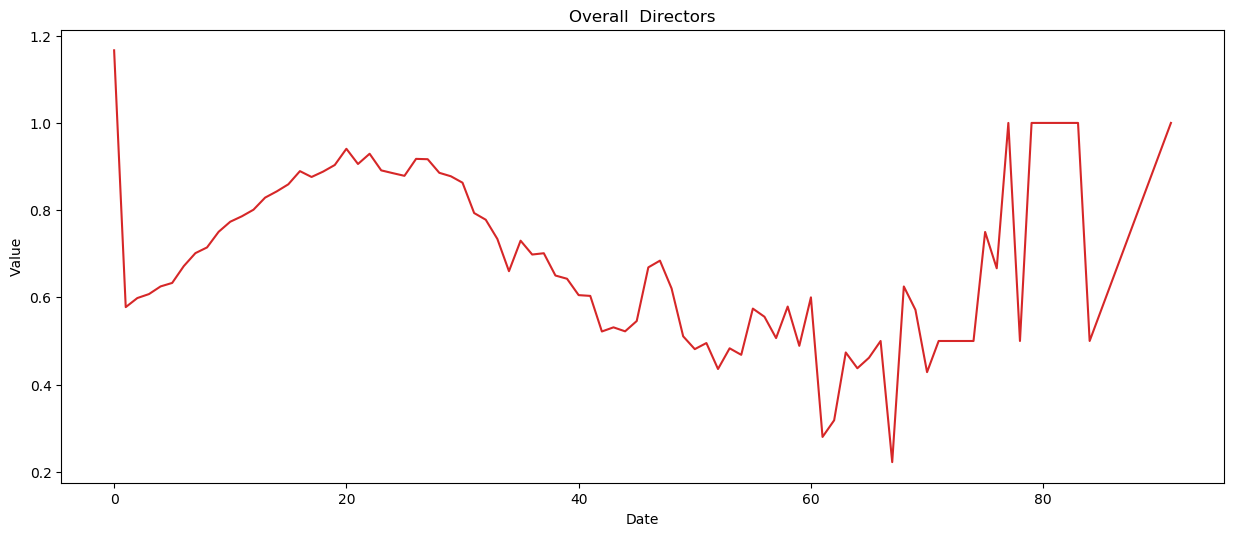

In [53]:
# Number of movies produced over the years by both the gender

careerYearOverallDF = pd.DataFrame({'Career_Year_Number':overall_avg_movie_per_year.index,'Average':overall_avg_movie_per_year.values})
careerYearOverallDF.Career_Year_Number = careerYearOverallDF.Career_Year_Number.astype(int)
careerYearOverallDF = careerYearOverallDF.sort_values(by ='Career_Year_Number')
plot_df(careerYearOverallDF, x=careerYearOverallDF.Career_Year_Number, y=careerYearOverallDF.Average, title='Overall  Directors')

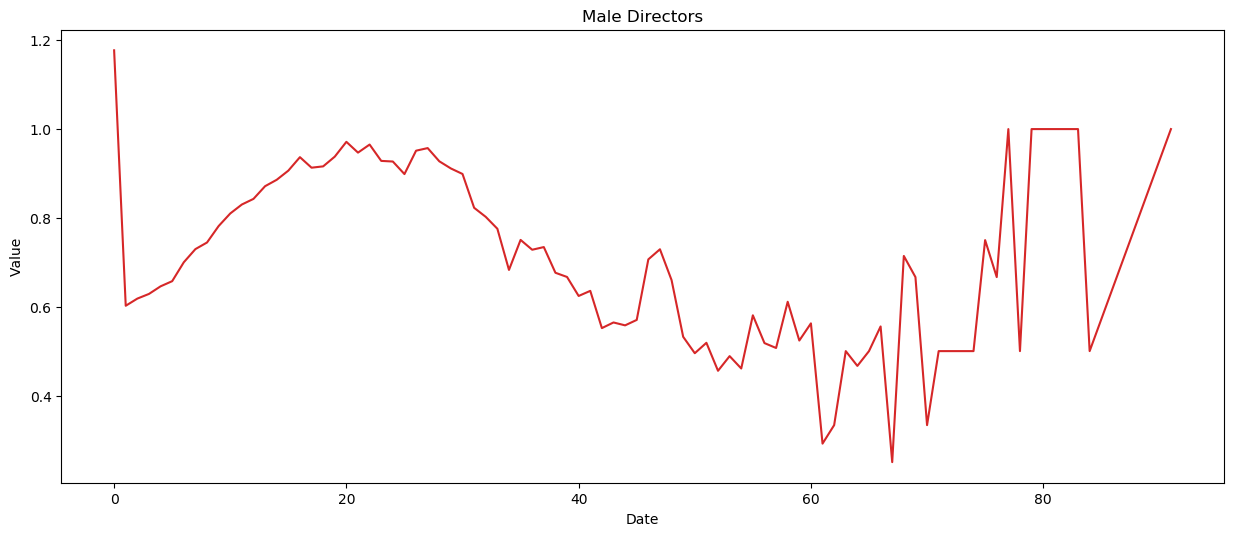

In [54]:
# Number of movies produced over the years by Male

careerYearMaleDF = pd.DataFrame({'Career_Year_Number':male_avg_movie_per_year.index,'Average':male_avg_movie_per_year.values})
careerYearMaleDF = careerYearMaleDF.sort_values(by ='Career_Year_Number')
# yearDF = yearDF[yearDF.Year < 2017]
plot_df(careerYearMaleDF, x=careerYearMaleDF.Career_Year_Number, y=careerYearMaleDF.Average, title='Male Directors')

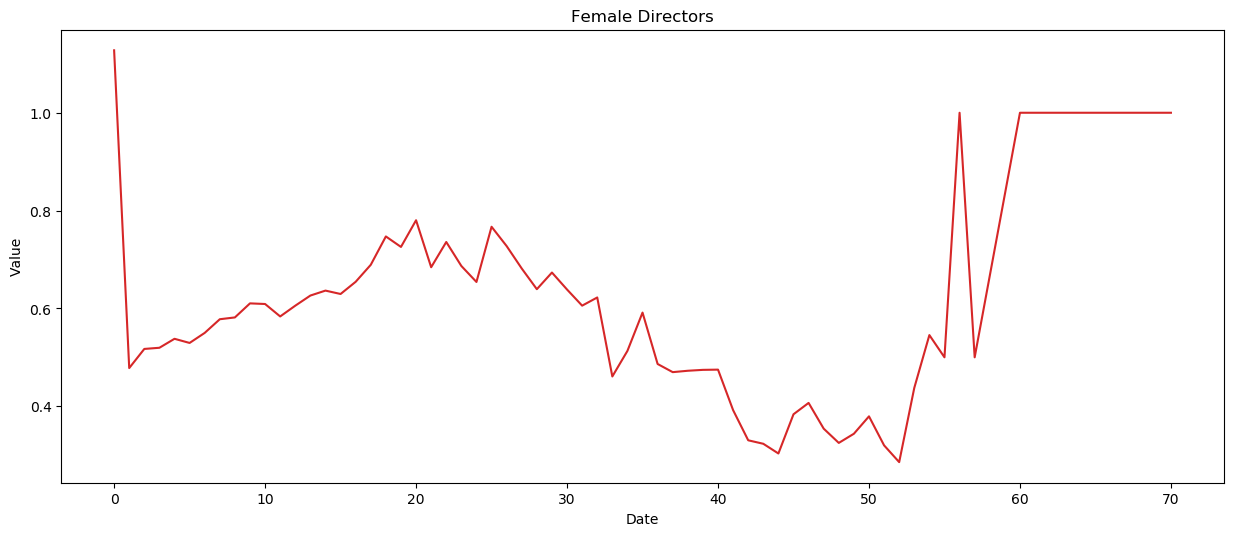

In [55]:
# Number of movies produced over the years by Female

careerYearFemaleDF = pd.DataFrame({'Career_Year_Number':female_avg_movie_per_year.index,'Average':female_avg_movie_per_year.values})
careerYearFemaleDF = careerYearFemaleDF.sort_values(by ='Career_Year_Number')
# yearDF = yearDF[yearDF.Year < 2017]
plot_df(careerYearFemaleDF, x=careerYearFemaleDF.Career_Year_Number, y=careerYearFemaleDF.Average, title='Female Directors')

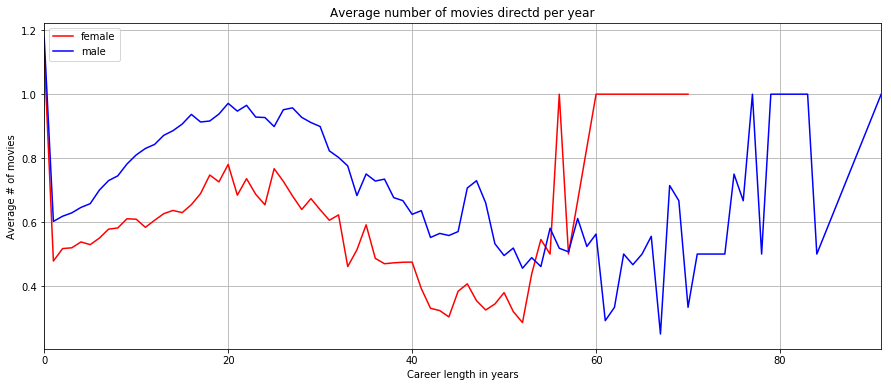

In [56]:
#plt.figure(figsize=(15,6))
fig, ax = plt.subplots(figsize=(15,6))

ax1 = female_avg_movie_per_year.plot(color='red', grid=True, label='female')
ax2 = male_avg_movie_per_year.plot(color='blue', grid=True, label='male')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
plt.legend(h1, l1, loc=2)

#plt.rcParams.update({'font.size': 12})
plt.xlabel('Career length in years')
plt.ylabel('Average # of movies')
plt.title('Average number of movies directd per year')
#ax2.yaxis.tick_left()
# Do the plot code
plt.savefig('Average_number_movies_per_Year.eps', format='eps', dpi=1200)
# Convert to eps

# Plot Drop Out

In [57]:
#plot_df(careerYearOverallDF, x=careerYearOverallDF.Career_Year_Number, y=overallPivotTableFinal.count(axis=0) / overallPivotTable.shape[0], title='Drop-Out Rate Overall')

In [58]:
# # Drop out

# #plt.plot(careerYearOverallDF.Career_Year_Number, overallPivotTableFinal.count(axis=0) / overallPivotTable.shape[0],'g-')
# plt.plot(careerYearFemaleDF.Career_Year_Number, femalePivotTableFinal.count(axis=0) / femalePivotTableFinal.shape[0],'r-')
# plt.plot(careerYearMaleDF.Career_Year_Number, malePivotTableFinal.count(axis=0) / malePivotTableFinal.shape[0],'b-')


In [59]:
# print(len(careerYearFemaleDF.Career_Year_Number), len(femalePivotTableFinal.count(axis=0) / femalePivotTableFinal.shape[0]))


# print("Career Male Length",len(careerYearMaleDF.Career_Year_Number),\
#       len(malePivotTableFinal.count(axis=0) / malePivotTableFinal.shape[0]))

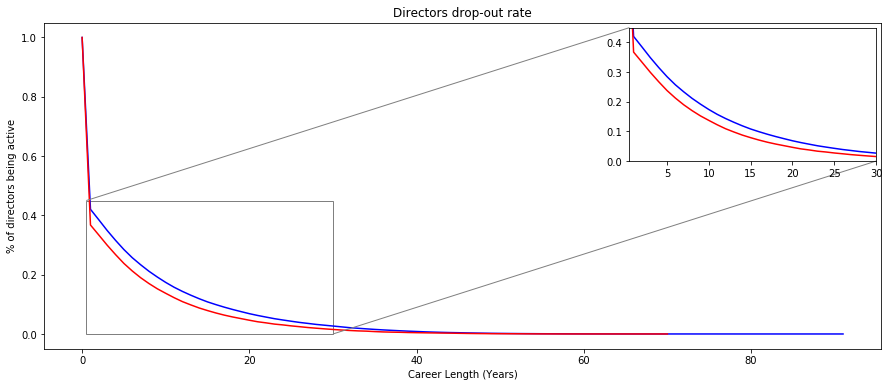

In [60]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes 
from mpl_toolkits.axes_grid1.inset_locator import mark_inset


#Source: https://stackoverflow.com/questions/26223937/matplotlib-pandas-zoom-part-of-a-plot-with-time-series/26229669#26229669

x = careerYearMaleDF.Career_Year_Number
y1 =  malePivotTableFinal.count(axis=0) / malePivotTableFinal.shape[0]
y2 = femalePivotTableFinal.count(axis=0) / femalePivotTableFinal.shape[0]

fig = plt.figure(figsize=(15,6))
ax = plt.axes()
ax.plot(y1,'b-')
ax.plot(y2,'r-')
ax.set_xlabel('Career Length (Years)')
ax.set_ylabel('% of directors being active')
ax.set_title('Directors drop-out rate')
#Range of the Zoom-in Part
x1= 0.5
x2 = 30
y3=0.0
y4=0.45


axins = zoomed_inset_axes(ax, 1, loc=1) # zoom = 2
axins.plot(y1,'b-')
axins.plot(y2,'r-')#
axins.set_xlim(x1, x2)
axins.set_ylim(y3, y4)
plt.xticks(visible=True)
plt.yticks(visible=True)
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")
plt.draw()
plt.savefig('Drop_out_rate.eps', format='eps', dpi=1200)
plt.show()

In [61]:
# To mathematically arrive at a year to get a drop out year cut-off 

y = overallPivotTableFinal.count(axis=0) / overallPivotTable.shape[0]
y.name= "Percentage"
dropCareerYearAt = y.to_frame()
dropCareerYearNumber = dropCareerYearAt.loc[dropCareerYearAt.Percentage >= 0.01].index.max()
dropCareerYearNumber

37

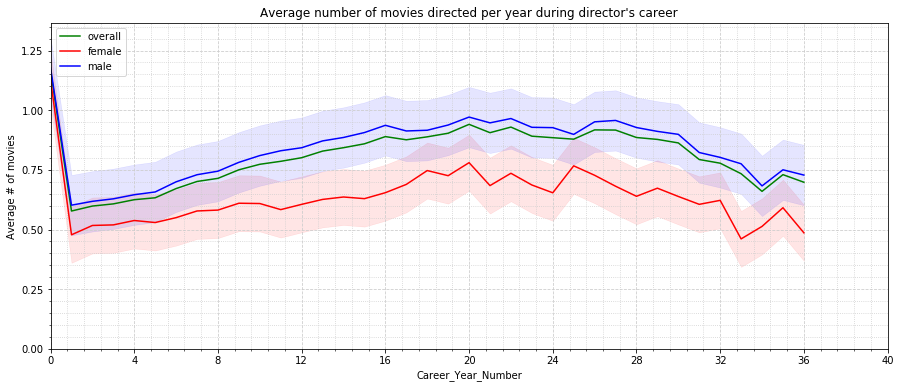

In [62]:
plt.figure(figsize  = (15,6))
plt.xlabel('Plotting')

y_overall = overall_avg_movie_per_year.head(dropCareerYearNumber)
y_female = female_avg_movie_per_year.head(dropCareerYearNumber)
x = careerYearOverallDF.Career_Year_Number.head(dropCareerYearNumber)
#plt.plot(x,y_female,'r-')

y_std = y_female.std(axis=0)

plt.fill_between(x , y_female-y_std , y_female+y_std ,edgecolor = '#CC4F1B', color ='red' , linewidth = 0.5,alpha = 0.1)

y_male = male_avg_movie_per_year.head(dropCareerYearNumber)
#plt.plot(x,y_male,'b-')

x_std = y_male.std(axis=0)

plt.fill_between(x , y_male-x_std , y_male+x_std ,edgecolor = '#CC4F1B', color ='blue' , linewidth = 0.5,alpha = 0.1)

#plt.plot(x,y_overall,'g-')


# Limits of the graph
xUpperLimit = overall_avg_movie_per_year.head(dropCareerYearNumber).index.max() + 4
yUpperLimit = overall_avg_movie_per_year.head(dropCareerYearNumber)[0].max() + 0.2

plt.axis([0, xUpperLimit, 0, yUpperLimit])

ax3 = overall_avg_movie_per_year.head(dropCareerYearNumber).plot(color='green', grid=True, label='overall')
ax1 = female_avg_movie_per_year.head(dropCareerYearNumber).plot(color='red', grid=True, label='female')
ax2 = male_avg_movie_per_year.head(dropCareerYearNumber).plot(color='blue', grid=True, label='male')


plt.ylabel('Average # of movies')

h1, l1 = ax1.get_legend_handles_labels()

# Limits of the graph
xUpperLimit = overall_avg_movie_per_year.head(dropCareerYearNumber).index.max() + 4
yUpperLimit = overall_avg_movie_per_year.head(dropCareerYearNumber)[0].max() + 0.2

# Set axis ranges; by default this will put major ticks every 25.
ax1.set_xlim(0,xUpperLimit)
ax1.set_ylim(0,yUpperLimit)

# Change major ticks to show every 10 and 0.5 units.
ax1.xaxis.set_major_locator(MultipleLocator(round(xUpperLimit/10)))
ax1.yaxis.set_major_locator(MultipleLocator(round(yUpperLimit/10,1)*2.5))

# Change minor ticks to show every 10/5 units and 0.5/2 units
ax1.xaxis.set_minor_locator(AutoMinorLocator(5))
ax1.yaxis.set_minor_locator(AutoMinorLocator(5))

# Turn grid on for both major and minor ticks and style minor slightly differently.
ax1.grid(which='major', color='#CCCCCC', linestyle='--')
ax1.grid(which='minor', color='#CCCCCC', linestyle=':')
ax1.set_title('Average number of movies directed per year during director\'s career')

#plt.rcParams.update({'font.size': 14})

#Add ticks outwards
ax1.tick_params(which = 'both', direction = 'out')
plt.savefig('Avg_Num_movies_SD.eps', format='eps', dpi=1200)

plt.legend(h1, l1, loc=2)
plt.show()



# Ranking Procedure 1

In [63]:
#replace None values with 0

WithFirstMovieYearDF['rating_count'] = WithFirstMovieYearDF['rating_count'].replace('None',0)
WithFirstMovieYearDF['rating_value'] = WithFirstMovieYearDF['rating_value'].replace('None',0)

WithFirstMovieYearDF.rating_count = WithFirstMovieYearDF.rating_count.astype(int)
WithFirstMovieYearDF.rating_value = WithFirstMovieYearDF.rating_value.astype(float)


In [64]:
#Copying the dataframe for the 2nd procedure to repeat the process
RankingProcedure2 = WithFirstMovieYearDF.copy()

In [65]:
#data.groupby('director_ids')['rating_count'].sum()

In [66]:
#Aggregating sum of Rating Count on director_ids

female_top10_reviewCount = WithFirstMovieYearDF.loc[WithFirstMovieYearDF['Gender'] == 'Female']\
                                                    .groupby('director_ids')['rating_count']\
                                                    .sum()\
                                                    .sort_values(ascending=False)


male_top10_reviewCount = WithFirstMovieYearDF.loc[WithFirstMovieYearDF['Gender'] == 'Male']\
                                                    .groupby('director_ids')['rating_count'].sum()\
                                                    .sort_values(ascending=False)


#storing the top 1000 director_ids based on rating count
male_top_directors  = list(male_top10_reviewCount.head(1000).index)
female_top_directors = list(female_top10_reviewCount.head(1000).index)
top_directors_together = male_top_directors + female_top_directors
 

#Creating dataframe consisting only from directors in the list from above male_top_directors and female_top_directors
female_top_dataframe = WithFirstMovieYearDF[WithFirstMovieYearDF.director_ids.isin(female_top_directors)]
male_top_dataframe = WithFirstMovieYearDF[WithFirstMovieYearDF.director_ids.isin(male_top_directors)]



#top_directors_dataframe = data[data.director_ids.isin(top_directors_together)]
#print(len(female_top_dataframe.director_ids.unique()),len(male_top_dataframe.director_ids.unique()))


In [67]:
#Summing over rating value ---> top 10 directors with the highest sum of rating values 
female_top10_ratingVal = list(female_top_dataframe.groupby('director_ids')['rating_value'].sum()\
                        .sort_values(ascending=False)\
                        .head(100).index)


male_top10_ratingVal = list(male_top_dataframe.groupby('director_ids')['rating_value'].sum()\
                        .sort_values(ascending=False)\
                        .head(100).index)

#creating dataframe for male and female top directors 
female_top_dataframe_final = WithFirstMovieYearDF[WithFirstMovieYearDF.director_ids.isin(female_top10_ratingVal)]
male_top_dataframe_final = WithFirstMovieYearDF[WithFirstMovieYearDF.director_ids.isin(male_top10_ratingVal)]




In [68]:

male_top_dataframe_final.shape

(12843, 21)

In [69]:
TOP10_female_male_dataframe = pd.concat([female_top_dataframe_final,male_top_dataframe_final])

In [70]:
#Check if the number of rows in the concatinated dataframe
check = (female_top_dataframe_final.shape[0] + male_top_dataframe_final.shape[0]) - TOP10_female_male_dataframe.shape[0]

print('Check of the merged dataframe --->', check)

Check of the merged dataframe ---> 0


<Figure size 1080x432 with 0 Axes>

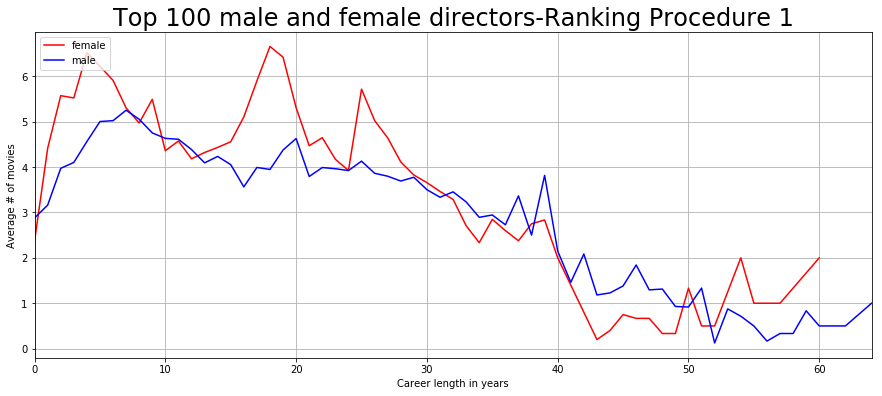

In [71]:
sortAscendingDF = TOP10_female_male_dataframe.sort_values(by='movie_year',ascending = True)
AscendingWithoutDuplicatesDP = sortAscendingDF.drop_duplicates(subset= 'director_ids',keep='first')

# Store Career Start year of each director. Fetch the columns required for merge

fetchFirstMovieYearDF = AscendingWithoutDuplicatesDP[['movie_year','director_ids']]
fetchFirstMovieYearDF = fetchFirstMovieYearDF.rename(columns={'movie_year':'CareerStartYear'})

WithFirstMovieYearDF = TOP10_female_male_dataframe.merge(fetchFirstMovieYearDF, on='director_ids',how = 'left')
#WithFirstMovieYearDF["Career_Year_Number"] = WithFirstMovieYearDF.movie_year - WithFirstMovieYearDF.CareerStartYear + 1
WithFirstMovieYearDF["Career_Year_Number"] = WithFirstMovieYearDF.movie_year - WithFirstMovieYearDF.CareerStartYear_y



WithFirstMovieYearDF.movie_year = WithFirstMovieYearDF.movie_year.astype(int)
WithFirstMovieYearDF.deathYear = WithFirstMovieYearDF.deathYear.astype(int)
WithFirstMovieYearDF.birthYear = WithFirstMovieYearDF.birthYear.astype(int)




WithFirstMovieYearDF['Dummy'] = 1


malePivotData = WithFirstMovieYearDF.loc[WithFirstMovieYearDF['Gender'] == 'Male']
femalePivotData = WithFirstMovieYearDF.loc[WithFirstMovieYearDF['Gender'] == 'Female']




# Reseting the pivot table index so I can have directorID and Gender as column and rotate

malePivotTable = pd.pivot_table(malePivotData, values='Dummy', index=['director_ids'],
                                columns=['Career_Year_Number',], aggfunc=np.sum)


# Reseting the pivot table index so I can have directorID and Gender as column and rotate

femalePivotTable = pd.pivot_table(femalePivotData, values='Dummy', index=['director_ids'],
                                  columns=['Career_Year_Number'], aggfunc=np.sum)

career_length_male = malePivotTable.apply(columnNameOfFirstNonNullValue, axis= 'columns')
career_length_female = femalePivotTable.apply(columnNameOfFirstNonNullValue, axis= 'columns')


malePivotTable["career_length"] = career_length_male.tolist()
femalePivotTable["career_length"] = career_length_female.tolist()


# Important: Fill 0s wherever the it is empty for each director until their career ends -- female

m2= femalePivotTable.columns[:-1].values <= femalePivotTable.career_length.values[:, None]
femalePivotTableFinal = femalePivotTable.iloc[:, :-1].fillna(value = 0, axis=1).where(m2)


# Important: Fill 0s wherever the it is empty for each director until their career ends -- male

m3 = malePivotTable.columns[:-1].values <= malePivotTable.career_length.values[:, None]
malePivotTableFinal = malePivotTable.iloc[:, :-1].fillna(value = 0, axis=1).where(m3)


female_avg_movie_per_year =  femalePivotTableFinal.sum(axis=0) / femalePivotTableFinal.count(axis=0)
male_avg_movie_per_year = malePivotTableFinal.sum(axis=0) / malePivotTableFinal.count(axis=0)









plt.figure(figsize=(15,6))
fig, ax = plt.subplots(figsize=(15,6))

ax1 = female_avg_movie_per_year.plot(color='red', grid=True, label='female')
ax2 = male_avg_movie_per_year.plot(color='blue', grid=True, label='male')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
plt.legend(h1, l1, loc=2)

plt.rcParams.update({'font.size': 20})
plt.xlabel('Career length in years')
plt.ylabel('Average # of movies')
plt.title('Top 100 male and female directors-Ranking Procedure 1')
#ax2.yaxis.tick_left()
# Do the plot code
plt.savefig('RankingProcedure_1.eps', format='eps', dpi=1200)
# Convert to eps


# Ranking Procedure 2

In [72]:
#Aggregating sum of Rating value on director_ids

female_top10_ratingVal = RankingProcedure2.loc[RankingProcedure2['Gender'] == 'Female']\
                                                    .groupby('director_ids')['rating_value']\
                                                    .sum()\
                                                    .sort_values(ascending=False)


male_top10_ratingVal = RankingProcedure2.loc[RankingProcedure2['Gender'] == 'Male']\
                                                    .groupby('director_ids')['rating_value'].sum()\
                                                    .sort_values(ascending=False)


#storing the top 1000 director_ids based on rating count
male_top_directors  = list(male_top10_ratingVal.head(1000).index)
female_top_directors = list(female_top10_ratingVal.head(1000).index)
 

#Creating dataframe consisting only from directors in the list from above male_top_directors and female_top_directors
female_top_dataframe = RankingProcedure2[RankingProcedure2.director_ids.isin(female_top_directors)]
male_top_dataframe = RankingProcedure2[RankingProcedure2.director_ids.isin(male_top_directors)]


############### Step 2####################################


#Summing over rating value ---> top 10 directors with the highest sum of rating values 
female_top10_ratingCount = list(female_top_dataframe.groupby('director_ids')['rating_count'].sum()\
                        .sort_values(ascending=False)\
                        .head(100).index)


male_top10_ratingCount = list(male_top_dataframe.groupby('director_ids')['rating_count'].sum()\
                        .sort_values(ascending=False)\
                        .head(100).index)

#creating dataframe for male and female top directors 
female_top_dataframe_final_2 = RankingProcedure2[RankingProcedure2.director_ids.isin(female_top10_ratingCount)]
male_top_dataframe_final_2 = RankingProcedure2[RankingProcedure2.director_ids.isin(male_top10_ratingCount)]



############### Step 3 ####################################



TOP10_female_male_dataframe_2 = pd.concat([female_top_dataframe_final_2,male_top_dataframe_final_2])



<Figure size 1080x432 with 0 Axes>

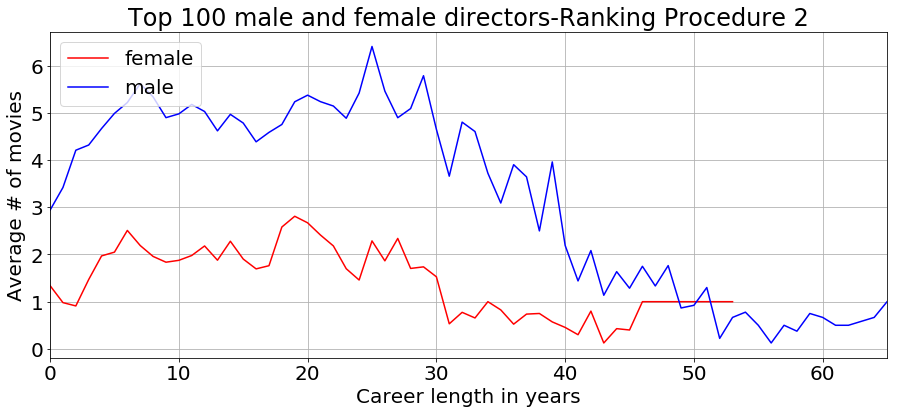

In [73]:
sortAscendingDF_2 = TOP10_female_male_dataframe_2.sort_values(by='movie_year',ascending = True)
AscendingWithoutDuplicatesDP_2 = sortAscendingDF_2.drop_duplicates(subset= 'director_ids',keep='first')

# Store Career Start year of each director. Fetch the columns required for merge

fetchFirstMovieYearDF_2 = AscendingWithoutDuplicatesDP_2[['movie_year','director_ids']]
fetchFirstMovieYearDF_2 = fetchFirstMovieYearDF_2.rename(columns={'movie_year':'CareerStartYear'})

RankingProcedure2 = TOP10_female_male_dataframe_2.merge(fetchFirstMovieYearDF_2, on='director_ids',how = 'left')
#WithFirstMovieYearDF["Career_Year_Number"] = WithFirstMovieYearDF.movie_year - WithFirstMovieYearDF.CareerStartYear + 1
RankingProcedure2["Career_Year_Number"] = RankingProcedure2.movie_year - RankingProcedure2.CareerStartYear_y



RankingProcedure2.movie_year = RankingProcedure2.movie_year.astype(int)
RankingProcedure2.deathYear = RankingProcedure2.deathYear.astype(int)
RankingProcedure2.birthYear = RankingProcedure2.birthYear.astype(int)




RankingProcedure2['Dummy'] = 1


malePivotData_2 = RankingProcedure2.loc[RankingProcedure2['Gender'] == 'Male']
femalePivotData_2 = RankingProcedure2.loc[RankingProcedure2['Gender'] == 'Female']




# Reseting the pivot table index so I can have directorID and Gender as column and rotate

malePivotTable_2 = pd.pivot_table(malePivotData_2, values='Dummy', index=['director_ids'],
                                columns=['Career_Year_Number',], aggfunc=np.sum)


# Reseting the pivot table index so I can have directorID and Gender as column and rotate

femalePivotTable_2 = pd.pivot_table(femalePivotData_2, values='Dummy', index=['director_ids'],
                                  columns=['Career_Year_Number'], aggfunc=np.sum)

career_length_male_2 = malePivotTable_2.apply(columnNameOfFirstNonNullValue, axis= 'columns')
career_length_female_2 = femalePivotTable_2.apply(columnNameOfFirstNonNullValue, axis= 'columns')


malePivotTable_2["career_length"] = career_length_male_2.tolist()
femalePivotTable_2["career_length"] = career_length_female_2.tolist()


# Important: Fill 0s wherever the it is empty for each director until their career ends -- female

m2_2= femalePivotTable_2.columns[:-1].values <= femalePivotTable_2.career_length.values[:, None]
femalePivotTableFinal_2 = femalePivotTable_2.iloc[:, :-1].fillna(value = 0, axis=1).where(m2_2)


# Important: Fill 0s wherever the it is empty for each director until their career ends -- male

m3_2 = malePivotTable_2.columns[:-1].values <= malePivotTable_2.career_length.values[:, None]
malePivotTableFinal_2 = malePivotTable_2.iloc[:, :-1].fillna(value = 0, axis=1).where(m3_2)


female_avg_movie_per_year_2 =  femalePivotTableFinal_2.sum(axis=0) / femalePivotTableFinal_2.count(axis=0)
male_avg_movie_per_year_2 = malePivotTableFinal_2.sum(axis=0) / malePivotTableFinal_2.count(axis=0)





#### Plotting #####

plt.figure(figsize=(15,6))
fig, ax = plt.subplots(figsize=(15,6))

ax1 = female_avg_movie_per_year_2.plot(color='red', grid=True, label='female')
ax2 = male_avg_movie_per_year_2.plot(color='blue', grid=True, label='male')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
plt.legend(h1, l1, loc=2)

plt.rcParams.update({'font.size': 20})
plt.xlabel('Career length in years')
plt.ylabel('Average # of movies')
plt.title('Top 100 male and female directors-Ranking Procedure 2')
#ax2.yaxis.tick_left()
# Do the plot code
plt.savefig('RankingProcedure_2.eps', format='eps', dpi=1200)


# Convert to eps